# Login Analysis
***
## 1. Load Necessary Libraries & Import Data

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import data
raw_logins = pd.read_json('logins.json')
# display initial login data
print('Login Data:')
display(raw_logins)
# print data types of columns
print('----------\nData Type:')
display(raw_logins.dtypes)

Login Data:


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


----------
Data Type:


login_time    datetime64[ns]
dtype: object

## 2. Preprocessing
Expand login datetimes into individual features to group by select variables.

In [3]:
# create dataframe
logins = pd.Series(range(len(raw_logins.login_time)), index=raw_logins.login_time).resample('15T').sum()
logins = pd.DataFrame({'n_login':logins.values, 'datetime':logins.index}, index=logins.index).rename_axis('dt_idx')
# convert login timestamp object to datetime dtypes
base_dt = logins.datetime.dt

# create new columns using original datetime
# date only (no time)
logins['date'] = base_dt.date
# year
logins['year'] = base_dt.year
# month 
logins['month'] = base_dt.month
# day of the month 
logins['day'] = base_dt.day
# day of the week (number)
logins['weekday'] = base_dt.weekday
# day of the week (string)
logins['day_name'] = base_dt.day_name()
# hour of day
logins['hour'] = base_dt.hour
# minute of hour
logins['minute'] = base_dt.minute

# display final table
print('Login Data:')
display(logins)

Login Data:


,n_login,datetime,date,year,month,day,weekday,day_name,hour,minute
dt_idx,,,,,,,,,,
1970-01-01 20:00:00,6,1970-01-01 20:00:00,1970-01-01,1970,1,1,3,Thursday,20,0
1970-01-01 20:15:00,25,1970-01-01 20:15:00,1970-01-01,1970,1,1,3,Thursday,20,15
1970-01-01 20:30:00,113,1970-01-01 20:30:00,1970-01-01,1970,1,1,3,Thursday,20,30
1970-01-01 20:45:00,132,1970-01-01 20:45:00,1970-01-01,1970,1,1,3,Thursday,20,45
1970-01-01 21:00:00,25,1970-01-01 21:00:00,1970-01-01,1970,1,1,3,Thursday,21,0
...,...,...,...,...,...,...,...,...,...,...
1970-04-13 17:45:00,465593,1970-04-13 17:45:00,1970-04-13,1970,4,13,0,Monday,17,45
1970-04-13 18:00:00,465623,1970-04-13 18:00:00,1970-04-13,1970,4,13,0,Monday,18,0
1970-04-13 18:15:00,186251,1970-04-13 18:15:00,1970-04-13,1970,4,13,0,Monday,18,15


> **Data:**
> From the table above, we can see the login dates range from Januray of 1970 through half of April of 1970. This is useful information to note, because it tells us that we will not be looking anything longer than monthly cycles.
## 3. Login Cycles
### 3.1. All Logins
Below we will plot all the data and try to get a general idea of what cycles are worth taking a closer look into.

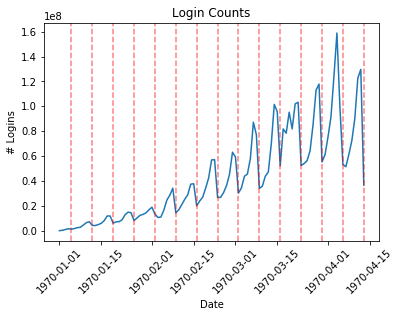

In [4]:
# group by date & day's name 
date = logins.groupby(by=['date', 'day_name']).n_login.sum().reset_index()
# get dates of all the mondays
mondays = date[date.day_name == 'Monday']

# plot login counts
plt.plot(date.date, date.n_login)
plt.xticks(rotation=45)
# plot mondays as dashed vertical lines
for mon in mondays.date:
    plt.axvline(mon, color='r', linestyle='--', alpha=0.5)
#show plot
plt.title('Login Counts')
plt.xlabel('Date')
plt.ylabel('# Logins')
plt.show()

>**All Data Cycles:**
> Overall, it can be noted that the number of logins increase the longer the product is left on the market; this makes sense, and since we do not have any more data, we cannot make any conclusions as to whether this growing trend is seasonal. However, what we can analyze with further detail is the weekly cycles. In the above plot, the dashed, vertical red lines represent the start of a week (Mondays). As it can be seen, there is a weekly cycle where the number of logins increase during the weekends but drastically drop at the start of each week (Mondays). This tells us that the highest usage of our product occurs during the weekends. In the following plot we will take a sample week and take a closer look at the week cycle. 

### 3.2. Weekly Cycles (January)
Using login counts of January, we can look at the logins' weekly cycle and see where in the week logins occur the most. 

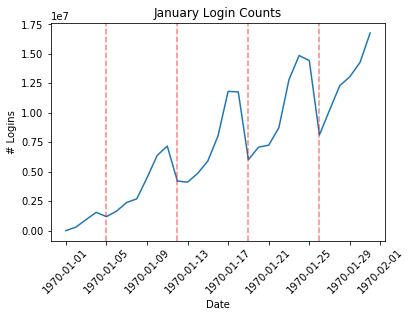

In [5]:
# filter for January logins & group by date and day_name
date_Jan = logins[logins.month == 1].groupby(by=['date', 'day_name']).n_login.sum().reset_index()
# all January mondays
monday_Jan = date_Jan[date_Jan.day_name == 'Monday']

# plot January logins
plt.plot(date_Jan.date, date_Jan.n_login)
plt.xticks(rotation=45)
# plot January mondays
for mon in monday_Jan.date:
    plt.axvline(mon, color='r', linestyle='--', alpha=0.5)
#show plot
plt.title('January Login Counts')
plt.xlabel('Date')
plt.ylabel('# Logins')
plt.show()

> **January's Weekly Login Cycles:**
> After plotting January's logins and, again, overlaying January's Mondays with dashed, vertical red lines, we can confirm our earlier observation that weekends do seem to get drastically more logins than weekdays. Further, the overall positive trend in number of logins can also be seen in the plot above as each following week marks a higher number of logins than the week before. 

### 3.3. Aggregated Weekly Cycle
In this section we will aggregrate login counts by the day of the week.

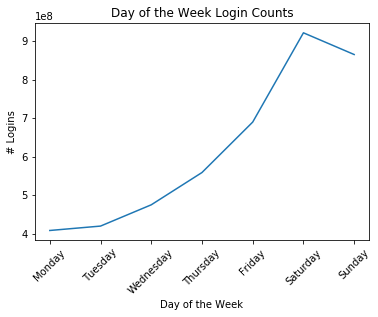

In [6]:
# group logins by day of the week
weekday = logins.groupby(by=['weekday', 'day_name']).n_login.sum().reset_index()

# plot logins based on day of the week
plt.plot(weekday.weekday, weekday.n_login)
plt.xticks(list(weekday.weekday), list(weekday.day_name), rotation=45)
plt.title('Day of the Week Login Counts')
plt.xlabel('Day of the Week')
plt.ylabel('# Logins')
plt.show()

> **Aggregated Weekly Cycle:**
> The plot above showing the accumulated login counts aggregated by day of week further shows the stark difference in logins from day to day. Mondays obtain the least number of logins, while Saturdays obtain the most; in fact, Saturdays get more than double the number of logins that Mondays do. From Monday thru Saturday logins exponentially increase with only a slight decrease of logins on Sunday; even though logins on Sunday do fall below Saturday logins, Sunday logins still outnumber Friday logins. Therefore, we can conclude that weekends obtain far greater logins than weekdays do. In the next plot we will hypothesize the reason as to why logins are far greater on the weekends and other interesting trends. 

### 3.4. Daily Cycles (15-Minute Intervals)
Daily cycles analyzing login counts grouped by 15 minute intervals; weekday and weekend logins will also be separated for a closer individual analysis of their corresponding login trends. 

In [7]:
def weekday_weekend(data, plotting_col, grouped_by, xlabel, plt_width=12, plt_height=4):
    """Plot all grouped data and separated weekday vs. weekend data"""
    # create figure
    plt.figure(figsize=(plt_width, plt_height))
    
    # plot overall grouped data
    plt.subplot(131)
    plt.plot(data[plotting_col], data.n_login)
    plt.title('All Login Counts')
    plt.xlabel(xlabel)
    plt.ylabel('# Logins')
    
    # plot weekday grouped data
    plt.subplot(132)
    for d in weekday.day_name[:5]:
        week_group = logins[logins.day_name == d].groupby(by=grouped_by).n_login.sum().reset_index()
        plt.plot(data[plotting_col], week_group.n_login, label=d)
        plt.title('Weekday Logins')
        plt.xlabel(xlabel)
        plt.legend()

    # plot weekend grouped data
    plt.subplot(133)
    for d in weekday.day_name[5:]:
        weekend_group = logins[logins.day_name == d].groupby(by=grouped_by).n_login.sum().reset_index()
        plt.plot(data[plotting_col], weekend_group.n_login, label=d)
        plt.title('Weekend Logins')
        plt.xlabel(xlabel)
        plt.legend()
        
    # plot figure
    plt.tight_layout()
    plt.show()

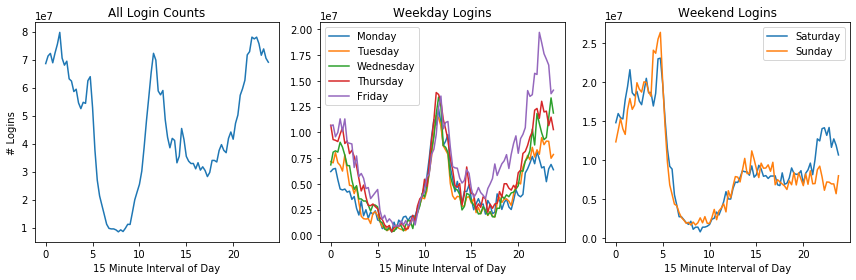

In [8]:
# group logins by hour & minute of day
minutes = logins.groupby(by=['hour', 'minute']).n_login.sum().reset_index()
# create a column that combines hour & minute of day
minutes['hr_min'] = minutes.hour + minutes.minute / 60

# plot all, weekday, and weekend minute cycles
weekday_weekend(minutes, ['hr_min'], ['hour', 'minute'], '15 Minute Interval of Day')

> **Daily Cycles (15-Min Intervals):**
> The plot on the right shows us the frequency of logins throughout the day regardless of what day of the week it is; it can be seen that logins peak very early in the morning, around noon and very late at night. However, once we plot all days of the week separately, we can better see how logins are distributed throughout the week. The middle plot contains the daily login cycles of Mondays thru Fridays, and the left plot contains Saturday and Sunday login trends. It can be noted that the noon spike in logins can be easily attributed to the login spike seen at noon throughout all the weekdays. However, the early morning spike in logins is easily mostly corresponding to the weekend's spike in logins early in the morning, around the hours of midnight to 5 am. The late night spike in logins can be attributed to all of the days of the week, Monday-Sunday. These observations make sense, because when using a taxi service, you only need it when you are going out. Therefore, on weekdays when people are working from mid-morning to mid afternoon there should not be much use of the taxi service offered by Ultimate; further, the login spike which occurs every weekday at noon does make sense, because this is the time at which they get a lunch break and may go out to get some food from a restaurant nearby. For the weekends, the greatest login counts occur early in the morning, because this is the time when people are leaving whatever event they partook and in need of Ultimate's taxi service. In conclusion, we learned that the most request for Ultimate's taxi service comes early in the morning and late at night every day of the week; further, throughout the weekdays, there is also a login spike around lunchtime. In order to gain additional insights, further data can be collected of not only one year but of multiple years; this will allow seasonal cycles to be explored as well. 